In [55]:
import matplotlib.pyplot as plt
import numpy as np


In [86]:
k = 1
A = 10
n = 2

In [100]:
x_1 = 85
x_2 = 15
S = x_1 + x_2
P = n * np.sqrt(x_1*x_2)
print("S:", S)
print("P:", P)

S: 100
P: 71.4142842854285


In [101]:
D = S
for i in range(256):
    D_p = (D/n)**n / (x_1 * x_2) * D
    D = (A* n**n * S + n * D_p) * D / ((A*n**n - 1) * D + (n+ 1) * D_p)
print("D:", D)

D: 97.85333086827161


[117.7379230025862, 104.99075083984458, 98.95088693990553, 94.81011449265074, 91.47660373618946, 88.56221710178514, 85.89375445397913, 83.38216371948678, 80.97695500350893, 78.64737109916666, 76.37361712208397, 74.14239022296567, 71.94443497029165, 69.77312874119197, 67.62362429627328, 65.49230965097442, 63.37645667225331, 61.27398623103684, 59.18330777579365, 57.10320788970555, 55.0327720348764, 52.97132944796637, 50.918414707197215, 48.873741757738266, 46.837187681072386, 44.80878452953245, 42.78871830631779, 40.777334773444956, 38.77515229687234, 36.78288244995953, 34.80145964238191, 32.832081663230596, 30.87626375742957, 28.935909708806708, 27.013404352574025, 25.111732856582417, 23.234632654136178, 21.386783315408053, 19.574036349335586, 17.80367803340025, 16.084699095619445, 14.428009068826686, 12.846475964214477, 11.354601980565015, 9.967605262256058, 8.699757232395289, 7.562121947170541, 6.560309857647252, 5.69316076943543]


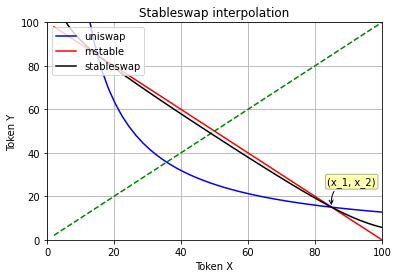

In [103]:

x_end = 100.0
num_steps = 50

fig, ax = plt.subplots()
ax.set_xlim(0, x_end)
ax.set_ylim(0, x_end)

ax.set(xlabel='Token X', ylabel='Token Y',
       title='Stableswap interpolation')
ax.grid()

ax.annotate('(x_1, x_2)', xy=(x_1, x_2), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))

x = np.linspace(0.0, x_end, num_steps)[1:]

y_uni = (P**2/4) / x
ax.plot(x, y_uni, color='b', label='uniswap')

y_mstable = S - x
ax.plot(x, y_mstable, color='r', label='mstable')

ax.plot(x, x, ls='--', color='g')

y_sswap = []
for x_ in x:
    a = 4*A
    b = 4*A*x_ + D - 4 * A * D
    c = -D**3/(4*x_)
    # x_minus = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    x_plus = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    # print(x_minus, x_plus)
    y_sswap.append(x_plus)

print(y_sswap)
ax.plot(x, y_sswap, 'black', label='stableswap')



# fig.savefig("test.png")
plt.legend(loc='upper left');
plt.show()